# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import os

# Merging the data into one csv file.

In [2]:
df = pd.read_csv(r"C:/Users/rehan/OneDrive - UMBC/DataSet/Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir(r'C:/Users/rehan/OneDrive - UMBC/DataSet/Sales_Data')]

sales_2019_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("C:/Users/rehan/OneDrive - UMBC/DataSet/Sales_Data/"+file)
    sales_2019_data = pd.concat([sales_2019_data, df])
    
sales_2019_data.to_csv("sdall_data.csv", index=False)


Reading the Updated DataFrame

In [3]:
sdall_data = pd.read_csv("sdall_data.csv")
sdall_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Data Cleaning

In [4]:
### Droping all rows With NaN values.
nan_df = sdall_data[sdall_data.isna().any(axis=1)]
nan_df.head()

sdall_data = sdall_data.dropna(how='all')
sdall_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [5]:
### Find 'Or' data and delete it -- Removing rows based on conditions.
sdall_data = sdall_data[sdall_data['Order Date'].str[0:2] != 'Or']

### Converting Columns to correct data type for analysis.

In [6]:
sdall_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [7]:
sdall_data['Quantity Ordered'] = sdall_data['Quantity Ordered'].astype('int32')
sdall_data['Price Each'] = sdall_data['Price Each'].astype('float', errors = 'raise')
sdall_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [8]:
sdall_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

# Augmenting data with additional columns

In [9]:
### Adding month Column from Order Date:

sdall_data['Month'] = sdall_data['Order Date'].str[0:2]
sdall_data['Month'] = sdall_data['Month'].astype('int32')
sdall_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


## Adding Sales Column

In [10]:
sdall_data['Sales'] = sdall_data['Quantity Ordered'] * sdall_data['Price Each']
sdall_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## Adding the City Column

In [11]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]
    
sdall_data['City'] = sdall_data['Purchase Address'].apply(lambda x: f" {get_city(x)} ({get_state(x)})")
sdall_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


# What was the best month for sales? How much Amount was earned that Much?

In [12]:
results = sdall_data.groupby('Month').sum()
print(results)

       Quantity Ordered    Price Each         Sales
Month                                              
1                 10903  1.811768e+06  1.822257e+06
2                 13449  2.188885e+06  2.202022e+06
3                 17005  2.791208e+06  2.807100e+06
4                 20558  3.367671e+06  3.390670e+06
5                 18667  3.135125e+06  3.152607e+06
6                 15253  2.562026e+06  2.577802e+06
7                 16072  2.632540e+06  2.647776e+06
8                 13448  2.230345e+06  2.244468e+06
9                 13109  2.084992e+06  2.097560e+06
10                22703  3.715555e+06  3.736727e+06
11                19798  3.180601e+06  3.199603e+06
12                28114  4.588415e+06  4.613443e+06


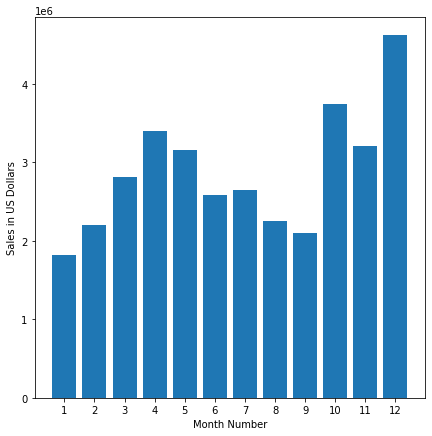

In [13]:
from matplotlib import pyplot as plt

months = range(1,13)

plt.figure(figsize=(7,7))
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.xlabel('Month Number')
plt.ylabel('Sales in US Dollars')
plt.show()

# What city had the highest number of sales?

In [14]:
results = sdall_data.groupby('City').sum()
print(results)

                      Quantity Ordered    Price Each   Month         Sales
City                                                                      
  Atlanta (GA)                   16602  2.779908e+06  104794  2.795499e+06
  Austin (TX)                    11153  1.809874e+06   69829  1.819582e+06
  Boston (MA)                    22528  3.637410e+06  141112  3.661642e+06
  Dallas (TX)                    16730  2.752628e+06  104620  2.767975e+06
  Los Angeles (CA)               33289  5.421435e+06  208325  5.452571e+06
  New York City (NY)             27932  4.635371e+06  175741  4.664317e+06
  Portland (ME)                   2750  4.471893e+05   17144  4.497583e+05
  Portland (OR)                  11303  1.860558e+06   70621  1.870732e+06
  San Francisco (CA)             50239  8.211462e+06  315520  8.262204e+06
  Seattle (WA)                   16553  2.733296e+06  104941  2.747755e+06


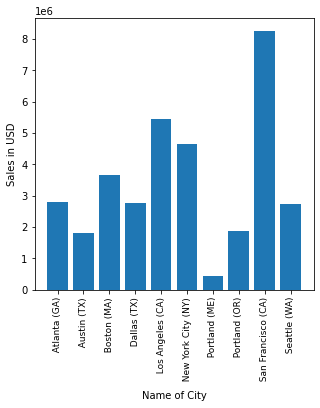

In [15]:
from matplotlib import pyplot as plt

Cities = [city for city, df in sdall_data.groupby('City')]

plt.figure(figsize=(5,5))
plt.bar(Cities, results['Sales'])
plt.xticks(Cities, rotation = 'vertical', size = 9)
plt.xlabel('Name of City')
plt.ylabel('Sales in USD')
plt.show()

# What Time should we display advertisements to maximize the likelihood of customer's buying product?

In [16]:
sdall_data['Order Date'] = pd.to_datetime(sdall_data['Order Date'])

In [17]:
sdall_data['Hour'] = sdall_data['Order Date'].dt.hour
sdall_data['Minute'] = sdall_data['Order Date'].dt.minute
sdall_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


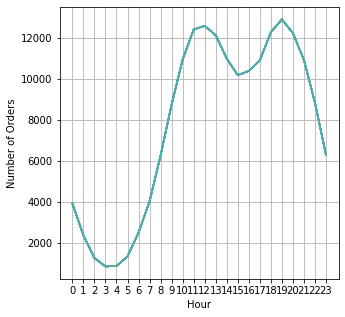

In [18]:
hours = [hour for hour, df in sdall_data.groupby('Hour')]

plt.figure(figsize=(5,5))
plt.plot(hours, sdall_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

# What products are most often sold together?

In [19]:
duplicate_orderID = sdall_data[sdall_data['Order ID'].duplicated(keep=False)]

duplicate_orderID

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31
...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta (GA),20,18
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta (GA),0,25
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta (GA),0,25
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco (CA),13,49


In [20]:
# combaing data with same order id
duplicate_orderID['Grouped'] = duplicate_orderID.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

duplicate_orderID.head()



<ipython-input-20-12a7f9a553d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_orderID['Grouped'] = duplicate_orderID.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [21]:
duplicate_orderID['Grouped'].head()

3                         Google Phone,Wired Headphones
4                         Google Phone,Wired Headphones
18                    Google Phone,USB-C Charging Cable
19                    Google Phone,USB-C Charging Cable
30    Bose SoundSport Headphones,Bose SoundSport Hea...
Name: Grouped, dtype: object

In [22]:
# droping dulicate rows and considering only 'Order ID', 'Grouped' col
unique_orderID = duplicate_orderID[['Order ID', 'Grouped']].drop_duplicates()
unique_orderID

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [23]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in unique_orderID['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common():
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin

# What Products sold the most? Why do you think it sold the most?

In [24]:
sdall_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


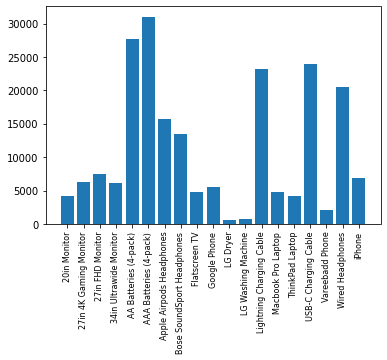

In [25]:
group_product = sdall_data.groupby('Product')
quantity_ordered = group_product.sum()['Quantity Ordered']


keys = [pair for pair, df in group_product]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

<ipython-input-26-97a584016e6f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
<ipython-input-26-97a584016e6f>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


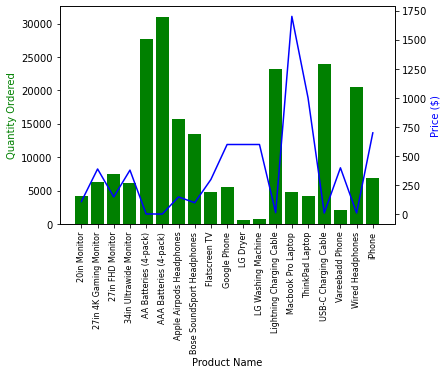

In [26]:
prices = sdall_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

In [27]:
sdall_data['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [28]:
sdall_data['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [29]:
products = [product for product, df in group_product]
products

['20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone']

<AxesSubplot:ylabel='Product'>

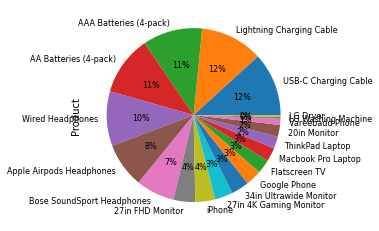

In [30]:
sdall_data['Product'].value_counts().plot.pie(autopct='%1.0f%%',textprops={'fontsize':8})

# Calculate the Total Sales per quarter i.e. for 3 months?

In [31]:
sdall_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Sales                      float64
City                        object
Hour                         int64
Minute                       int64
dtype: object

In [32]:
##sdall_data['Quarter'] = sdall_data['Order Date'].dt.to_period('Q')
sdall_data['Quarter'] = sdall_data['Order Date'].dt.quarter
sdall_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Quarter
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,2
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,2
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,2
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,2
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,2
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20,56,3
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16,0,3
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7,39,3
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17,30,3


In [33]:
sdall_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Sales                      float64
City                        object
Hour                         int64
Minute                       int64
Quarter                      int64
dtype: object

In [34]:
quater_sales = sdall_data.groupby('Quarter').sum()

print(quater_sales)

         Quantity Ordered    Price Each   Month         Sales    Hour   Minute
Quarter                                                                       
1                   41357  6.791861e+06   79118  6.831380e+06  531123  1084884
2                   54478  9.064822e+06  237270  9.121079e+06  696567  1434521
3                   42629  6.947877e+06  300328  6.989804e+06  546971  1112904
4                   70615  1.148457e+07  695931  1.154977e+07  905493  1849750


In [35]:
quater_sales['Sales']

Quarter
1    6.831380e+06
2    9.121079e+06
3    6.989804e+06
4    1.154977e+07
Name: Sales, dtype: float64

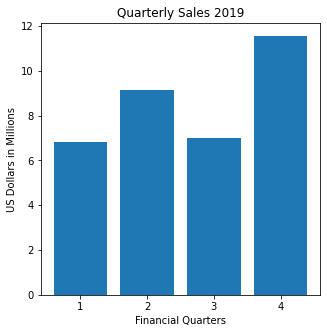

In [36]:
from matplotlib import pyplot as plt

quarters = range(1,5)

plt.figure(figsize=(5,5))
plt.bar(quarters, quater_sales['Sales']/1000000)
plt.title('Quarterly Sales 2019')
plt.xticks(quarters)
plt.xlabel('Financial Quarters')
plt.ylabel('US Dollars in Millions')
plt.show()

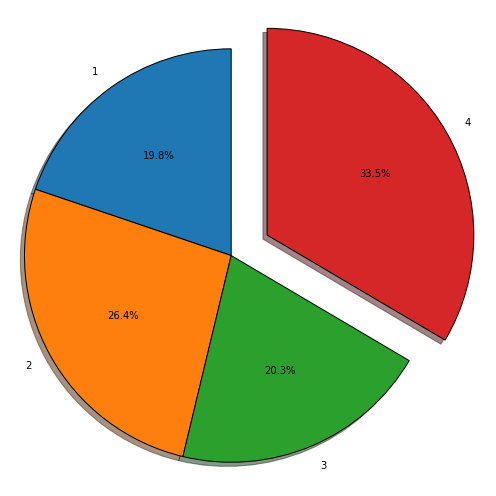

In [37]:
## Pie Chart Plotting for Quarterly sales
quater_sales = [pair for pair, sdall_data in (sdall_data.groupby('Quarter'))]
sale = sdall_data.groupby('Quarter').sum()['Sales']

    
plt.figure(figsize=(7,7))
plt.pie(sale, labels=quater_sales,shadow=True, autopct='%1.1f%%', startangle=90,explode=[0,0,0,0.2], wedgeprops={'edgecolor': 'black'})
plt.axis('equal')
plt.tight_layout()
plt.show()

# Which product was sold most in San Francisco?

In [38]:
sdall_data['City'] = sdall_data['City'].str.strip()

In [39]:
SF_data = sdall_data[sdall_data.City == 'San Francisco (CA)'].groupby('Product').sum()['Sales']
SF_data.sort_values(ascending=False)[0:1]

Product
Macbook Pro Laptop    1931200.0
Name: Sales, dtype: float64

# What are the Least 3 products sold in Texas?

In [40]:
TA_data = sdall_data[(sdall_data.City == 'Austin (TX)') | (sdall_data.City == 'Dallas (TX)')]
productTX = TA_data.groupby('Product').sum()['Sales']
productTX.sort_values(ascending=False)[-1:-4:-1]

Product
AAA Batteries (4-pack)    12474.28
AA Batteries (4-pack)     14150.40
Wired Headphones          33560.01
Name: Sales, dtype: float64

# Which day have most ordered items and what was top 3 product sold on that day.

In [41]:
sdall_data['Day'] = sdall_data['Order Date'].dt.day_name()

In [42]:
sdall_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Quarter,Day
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,2,Friday
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,2,Sunday
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,2,Friday
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,2,Friday
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,2,Tuesday


In [43]:
high_sale_day = sdall_data.groupby('Day').sum()
high_sale_day = high_sale_day.round(5)
high_sale_day

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Quarter
Day,,,,,,,
Friday,29448,4830795.59,184699,4855938.38,379231,776725,69956
Monday,29899,4850763.70,190462,4883326.72,382210,779741,72145
Saturday,29769,4873105.48,185836,4904357.01,382019,779294,70380
Sunday,29778,4903226.77,188819,4932169.66,384250,783205,71002
Thursday,29662,4810040.26,185521,4839465.16,380961,783278,70883
Tuesday,30724,5061153.03,193238,5087956.78,390675,803163,73746
Wednesday,29799,4960045.85,184072,4988822.26,380808,776653,70504


In [44]:
high_sale_day.sort_values('Quantity Ordered',ascending = False)

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Quarter
Day,,,,,,,
Tuesday,30724,5061153.03,193238,5087956.78,390675,803163,73746
Monday,29899,4850763.70,190462,4883326.72,382210,779741,72145
Wednesday,29799,4960045.85,184072,4988822.26,380808,776653,70504
Sunday,29778,4903226.77,188819,4932169.66,384250,783205,71002
Saturday,29769,4873105.48,185836,4904357.01,382019,779294,70380
Thursday,29662,4810040.26,185521,4839465.16,380961,783278,70883
Friday,29448,4830795.59,184699,4855938.38,379231,776725,69956


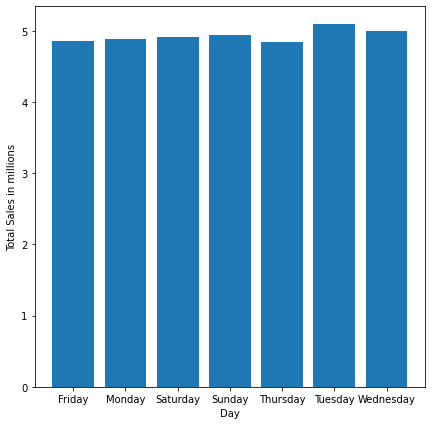

In [45]:
plt.figure(figsize=(7,7))
day = [day for day, df in sdall_data.groupby(['Day']) ]
plt.bar(day,high_sale_day['Sales']/1000000)
plt.xticks(day)
plt.ylabel('Total Sales in millions')
plt.xlabel('Day')
plt.show()

# Which month have most sale for iPhone

In [46]:
iphone_data = sdall_data[sdall_data.Product == 'iPhone'].groupby("Month").sum()['Sales']
iphone_data.max()
iphone_data[iphone_data == iphone_data.max()]

Month
12    634200.0
Name: Sales, dtype: float64

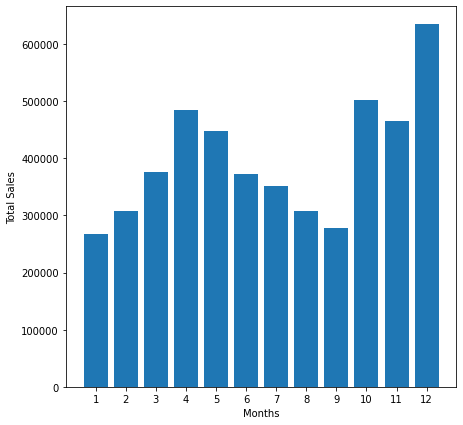

In [47]:
### Plotting for Iphone Data
plt.figure(figsize=(7,7))
months = range(1,13)
plt.bar(months,iphone_data)
plt.xticks(months)
plt.ylabel('Total Sales')
plt.xlabel('Months')
plt.show()

# What brand of products have higher purchase value?

In [48]:
price = sdall_data[['Product','Price Each']].sort_values('Price Each',ascending=False)
price

,Product,Price Each
160130,Macbook Pro Laptop,1700.00
30968,Macbook Pro Laptop,1700.00
140070,Macbook Pro Laptop,1700.00
183797,Macbook Pro Laptop,1700.00
107437,Macbook Pro Laptop,1700.00
...,...,...
66561,AAA Batteries (4-pack),2.99
157818,AAA Batteries (4-pack),2.99
66599,AAA Batteries (4-pack),2.99
157813,AAA Batteries (4-pack),2.99


In [49]:
price.drop_duplicates(inplace=True)
price

,Product,Price Each
160130,Macbook Pro Laptop,1700.00
149015,ThinkPad Laptop,999.99
62626,iPhone,700.00
89850,Google Phone,600.00
6866,LG Washing Machine,600.00
71375,LG Dryer,600.00
131624,Vareebadd Phone,400.00
171586,27in 4K Gaming Monitor,389.99
91567,34in Ultrawide Monitor,379.99
41876,Flatscreen TV,300.00


# Which state have most product ordered and which is top product orderd, Which product give highest sale.

In [50]:
sdall_data['State'] = sdall_data['Purchase Address'].apply(lambda x: f"{get_state(x)}")
sdall_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Quarter,Day,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,2,Friday,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,2,Sunday,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,2,Friday,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,2,Friday,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,2,Tuesday,CA


In [51]:
state_max_order = sdall_data.groupby("State").sum()['Quantity Ordered']

In [52]:
state_max_order.sort_values(ascending=False)

State
CA    83528
NY    27932
TX    27883
MA    22528
GA    16602
WA    16553
OR    11303
ME     2750
Name: Quantity Ordered, dtype: int32

In [53]:
state_max_sale = sdall_data.groupby("State").sum()['Sales'].round(5)
state_max_sale.sort_values(ascending=False)

State
CA    13714774.71
NY     4664317.43
TX     4587557.15
MA     3661642.01
GA     2795498.58
WA     2747755.48
OR     1870732.34
ME      449758.27
Name: Sales, dtype: float64

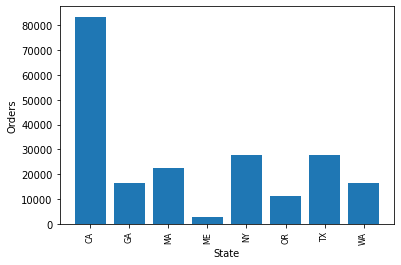

In [54]:
state = [state for state, df in sdall_data.groupby(['State'])]
plt.bar(state,state_max_order)
plt.ylabel('Orders')
plt.xlabel('State')
plt.xticks(state, rotation='vertical', size=8)
plt.show()

<ipython-input-55-21a5ba06e142>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(state, rotation='vertical', size=8)
<ipython-input-55-21a5ba06e142>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


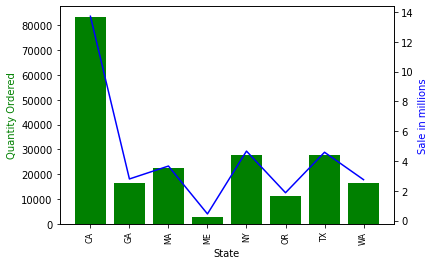

In [55]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(state, state_max_order, color='g')
ax2.plot(state, state_max_sale/1000000, color='b')

ax1.set_xlabel('State')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Sale in millions', color='b')
ax1.set_xticklabels(state, rotation='vertical', size=8)

fig.show()

# What product(s) is/are sold the most throught out the year?

In [56]:
test = sdall_data.groupby(['Month','Product']).sum()['Sales'].sort_values(ascending=False)
a = test.groupby(['Month','Product']).max().reset_index()
a.groupby(['Month']).max()


,Product,Sales
Month,,
1,iPhone,399500.0
2,iPhone,469200.0
3,iPhone,644300.0
4,iPhone,771800.0
5,iPhone,790500.0
6,iPhone,605200.0
7,iPhone,625600.0
8,iPhone,508300.0
9,iPhone,489600.0


# What month of the year is the best to sell laptops?

In [57]:
laptop_data = sdall_data[sdall_data.Product.str.contains('Laptop')].groupby("Month").sum()['Sales']
laptop_data.sort_values(ascending=False)

Month
12    1632094.61
10    1353495.39
4     1161796.10
5     1161496.29
11    1121996.26
3      989296.55
7      944596.81
6      919196.86
8      782297.26
2      744197.25
9      738597.51
1      618497.81
Name: Sales, dtype: float64

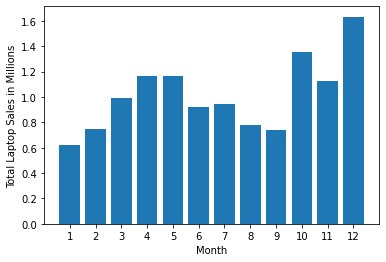

In [58]:
months = range(1,13)
plt.bar(months,laptop_data/1000000)
plt.xticks(months)
plt.ylabel('Total Laptop Sales in Millions')
plt.xlabel('Month')
plt.show()

# What are the other products sold with headphones?

In [59]:
df = unique_orderID[unique_orderID.Grouped.str.contains('Headphones')]
df = df.drop('Order ID',axis=1)
df


,Grouped
3,"Google Phone,Wired Headphones"
30,"Bose SoundSport Headphones,Bose SoundSport Hea..."
129,"Apple Airpods Headphones,ThinkPad Laptop"
138,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
250,"Google Phone,Bose SoundSport Headphones,Wired ..."
...,...
186597,"iPhone,Wired Headphones"
186611,"iPhone,Wired Headphones"
186761,"iPhone,Wired Headphones"
186781,"Apple Airpods Headphones,Apple Airpods Headphones"


In [60]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(5):
    print(key, value)


('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160


# What are the most and least sold products in Portland(ME) and San Francisco(CA)?

In [61]:
data = sdall_data[(sdall_data.City == 'San Francisco (CA)') | (sdall_data.City == 'Portland (ME)')]

In [62]:
data.groupby('Product').sum()['Sales'].sort_values(ascending=False)

Product
Macbook Pro Laptop            2038300.00
iPhone                        1218000.00
ThinkPad Laptop               1015989.84
Google Phone                   861000.00
27in 4K Gaming Monitor         602534.55
Apple Airpods Headphones       594900.00
34in Ultrawide Monitor         578344.78
Flatscreen TV                  364800.00
Bose SoundSport Headphones     349665.03
27in FHD Monitor               289180.72
Vareebadd Phone                204400.00
20in Monitor                   116479.41
LG Washing Machine             114600.00
LG Dryer                        89400.00
Lightning Charging Cable        87098.70
USB-C Charging Cable            74496.30
Wired Headphones                62887.55
AA Batteries (4-pack)           26664.96
AAA Batteries (4-pack)          23220.34
Name: Sales, dtype: float64